cbsa_name,1q17cac,2q17cac,3q17cac,4q17cac,1q17ltv,2q17ltv,3q17ltv,4q17ltv,dma_code,dma_name,total_pop,target_pop
Washington-Arlington-Alexandria DC-VA-MD-WV,32.47673,26.04043,31.77574,31.82384,285.68,273.68,240.21,246.74,511,"Washington, DC (Hagrstwn)",5352400,696200
Virginia Beach-Norfolk-Newport News VA-NC,33.27032,23.14971,29.01702,29.76046,162.37,160.76,148.11,152.74,544,Norfolk-Portsmth-Newpt Nws,1519700,251200
Urban Honolulu HI,28.26429,24.17484,31.09537,29.16115,162.37,160.76,148.11,152.74,744,Honolulu,1126400,136500
Tulsa OK,47.89429,37.84401,35.60363,35.39414,162.37,160.76,148.11,152.74,671,Tulsa,1077700,171600
Tucson AZ,34.24563,26.51950,36.46218,33.61297,162.37,160.76,148.11,152.74,789,Tucson (Sierra Vista),922200,121700
Tampa-St. Petersburg-Clearwater FL,39.49482,26.99300,35.08735,32.72720,147.64,149.32,152.83,157.95,539,Tampa-St. Pete (Sarasota),3783700,380700


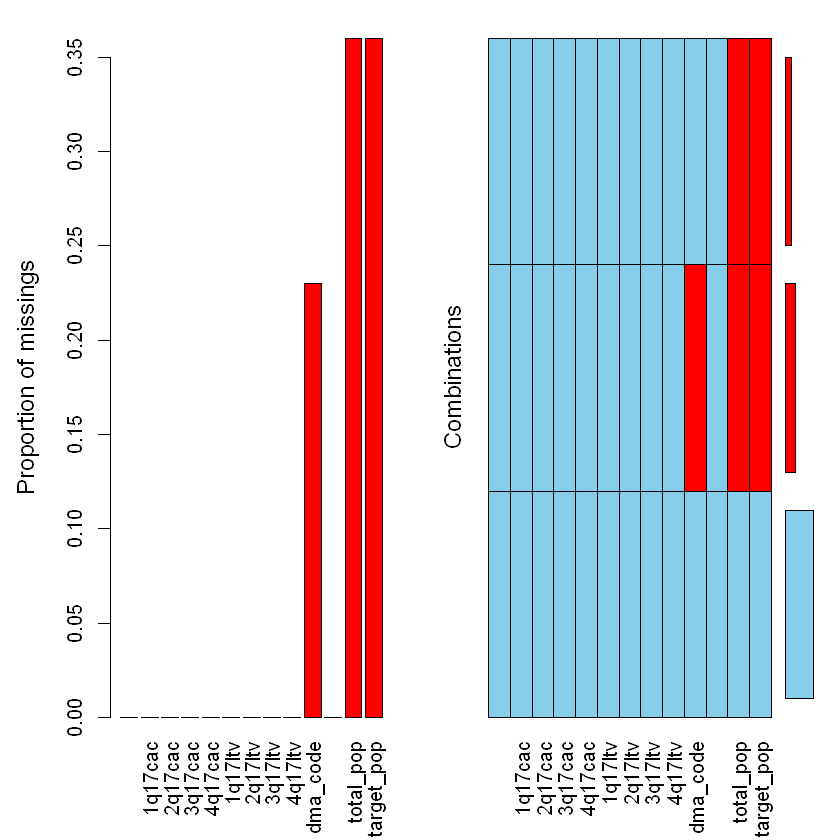

In [7]:
#install VIM
library(dplyr)
library(magrittr)


#read in file, label columns, remove NA
df<-read.csv(file = 'Data/Input1.csv')
colnames(df)<-c('cbsa_name','1q17cac','2q17cac','3q17cac','4q17cac','1q17ltv','2q17ltv','3q17ltv','4q17ltv','dma_code','dma_name','total_pop','target_pop')
df%<>%arrange(desc(cbsa_name))
library(VIM)
aggr(df)
df%<>%filter(!is.na(total_pop))
head(df)

In [2]:
#rearrange columns
dput(colnames(df))
df <- df[,c("dma_code", "1q17cac", "2q17cac", "3q17cac", "4q17cac", "1q17ltv", 
            "2q17ltv", "3q17ltv", "4q17ltv","total_pop", 
            "target_pop")]
head(df)
write.csv(df, file = "H_MasterInput v3.csv")

c("cbsa_name", "1q17cac", "2q17cac", "3q17cac", "4q17cac", "1q17ltv", 
"2q17ltv", "3q17ltv", "4q17ltv", "dma_code", "dma_name", "total_pop", 
"target_pop")


dma_code,1q17cac,2q17cac,3q17cac,4q17cac,1q17ltv,2q17ltv,3q17ltv,4q17ltv,total_pop,target_pop
511,32.47673,26.04043,31.77574,31.82384,285.68,273.68,240.21,246.74,5352400,696200
544,33.27032,23.14971,29.01702,29.76046,162.37,160.76,148.11,152.74,1519700,251200
744,28.26429,24.17484,31.09537,29.16115,162.37,160.76,148.11,152.74,1126400,136500
671,47.89429,37.84401,35.60363,35.39414,162.37,160.76,148.11,152.74,1077700,171600
789,34.24563,26.51950,36.46218,33.61297,162.37,160.76,148.11,152.74,922200,121700
539,39.49482,26.99300,35.08735,32.72720,147.64,149.32,152.83,157.95,3783700,380700


In [3]:
# scaling: index variables I don't want to scale, then scale the non-indexed
varnames <- c("dma_code")
index <- names(df) %in% varnames
df_s <- scale(df[, !index])
head(df_s)

1q17cac,2q17cac,3q17cac,4q17cac,1q17ltv,2q17ltv,3q17ltv,4q17ltv,total_pop,target_pop
-0.6426470,-0.3788029,-0.07846136,-0.02458212,2.6905533,2.7392562,2.6720381,2.6798376,0.8842498,0.99942974
-0.5223134,-0.9557832,-1.01950057,-0.61080277,-0.5808621,-0.5679281,-0.5003650,-0.4920982,-0.4822688,-0.42532544
-1.2813909,-0.7511703,-0.31054764,-0.78107261,-0.5808621,-0.5679281,-0.5003650,-0.4920982,-0.6224967,-0.79256009
1.6951621,1.9771657,1.22728258,0.98976562,-0.5808621,-0.5679281,-0.5003650,-0.4920982,-0.6398603,-0.68018052
-0.3744238,-0.2831813,1.52014763,0.48372208,-0.5808621,-0.5679281,-0.5003650,-0.4920982,-0.6953026,-0.83994520
0.4215256,-0.1886710,1.05117243,0.23206759,-0.9716491,-0.9029811,-0.3377836,-0.3162920,0.3249424,-0.01070567


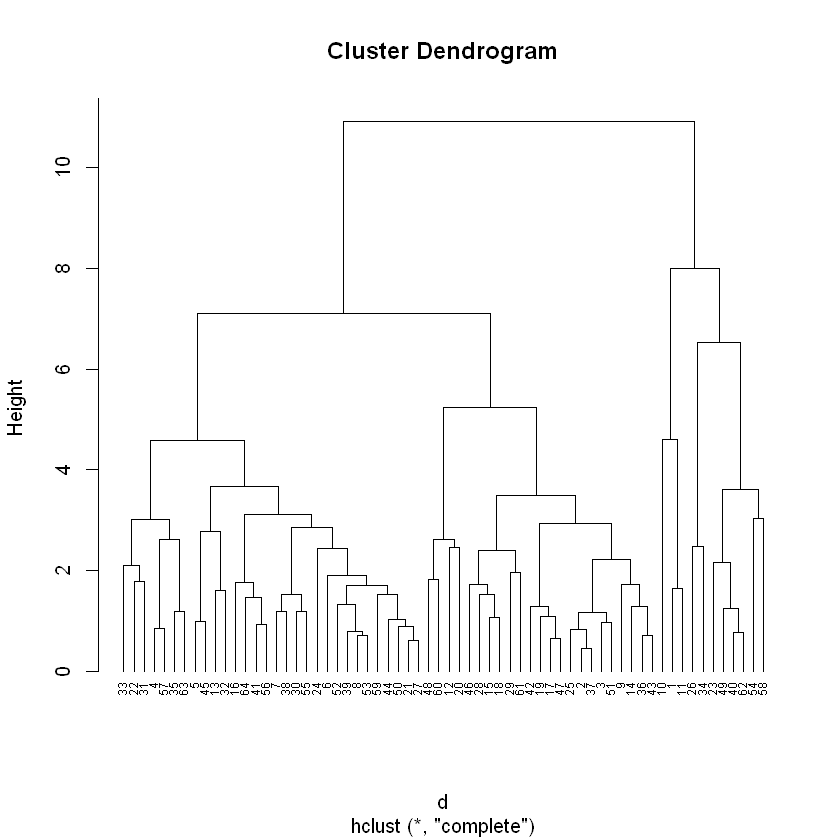

In [4]:
# Dissimilarity matrix, hierarchical clustering using Complete Linkage, plot dendrogram
d <- dist(df_s, method = "euclidean")
hc1 <- hclust(d, method = "complete" )
plot(hc1, cex = 0.6, hang = -1)

In [5]:
# Ward's method, cut tree into X groups (based on # of leaves between height 2-4), # of members in each cluster
hc5 <- hclust(d, method = "ward.D2" )
sub_grp <- cutree(hc5, k = 7) 
table(sub_grp)

sub_grp
 1  2  3  4  5  6  7 
 3 13 11 19 10  6  2 

Warning message:
"package 'factoextra' was built under R version 3.4.4"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.4"Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


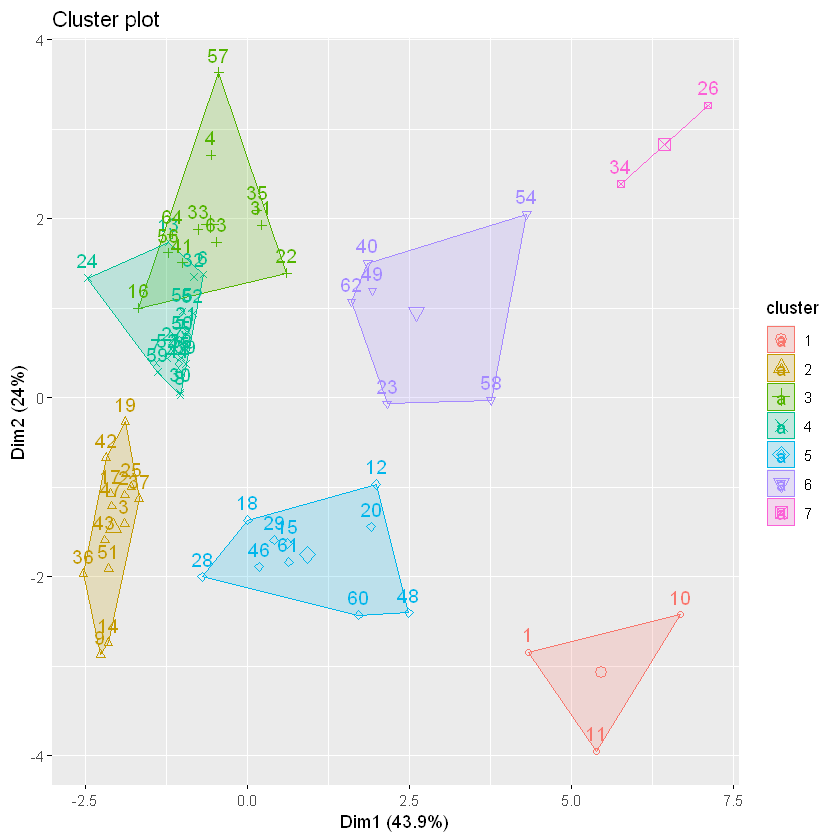

In [6]:
#add the the cluster each observation belongs to to our original data, visualize results
df %<>%
  mutate(cluster = sub_grp) #%>%
  #head
write.csv(df, file = "_MasterOutput.csv")
library(factoextra)
fviz_cluster(list(data = df, cluster = sub_grp))